In [207]:
import pandas as pd
import pvlib
import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [208]:
data_file = os.path.join(os.getcwd(), "output", "2021_04_01_08_Uhr.csv")

forecast_data = pd.read_csv(data_file, index_col="DATE")
forecast_data.index = pd.to_datetime(forecast_data.index)

ghi = forecast_data.RAD_WH

In [209]:
today = datetime.date.today() - datetime.timedelta(days=3)
start = datetime.datetime(year=today.year, month=today.month, day=today.day, hour=5)
start = pd.Timestamp(start).tz_localize('utc')
end = datetime.datetime(year=today.year, month=today.month, day=today.day, hour=20)
end = pd.Timestamp(end).tz_localize('utc')
ghi = ghi.loc[start:end]

In [210]:
mylatitude = 51.4
mylongitude = 6.86
myaltitude = 90
solpos = pvlib.solarposition.get_solarposition(time = ghi.index, latitude=mylatitude, longitude=mylongitude, altitude=myaltitude)

In [211]:
ghi

DATE
2021-04-01 05:00:00+00:00      0.00000
2021-04-01 06:00:00+00:00     11.11112
2021-04-01 07:00:00+00:00     72.22228
2021-04-01 08:00:00+00:00    180.55570
2021-04-01 09:00:00+00:00    316.66692
2021-04-01 10:00:00+00:00    444.44480
2021-04-01 11:00:00+00:00    544.44488
2021-04-01 12:00:00+00:00    580.55602
2021-04-01 13:00:00+00:00    569.44490
2021-04-01 14:00:00+00:00    519.44486
2021-04-01 15:00:00+00:00    455.55592
2021-04-01 16:00:00+00:00    325.00026
2021-04-01 17:00:00+00:00    177.77792
2021-04-01 18:00:00+00:00     52.77782
2021-04-01 19:00:00+00:00      0.00000
2021-04-01 20:00:00+00:00      0.00000
Name: RAD_WH, dtype: float64

In [212]:
dni =  pvlib.irradiance.disc(ghi=ghi, solar_zenith=solpos.zenith, datetime_or_doy=ghi.index)
dni

,dni,kt,airmass
DATE,,,
2021-04-01 05:00:00+00:00,0.000000,0.000000,NaN
2021-04-01 06:00:00+00:00,0.000000,0.063772,7.447030
2021-04-01 07:00:00+00:00,0.000000,0.184606,3.465236
2021-04-01 08:00:00+00:00,34.346475,0.307347,2.323494
2021-04-01 09:00:00+00:00,131.737256,0.422450,1.824801
2021-04-01 10:00:00+00:00,251.732823,0.512870,1.579788
2021-04-01 11:00:00+00:00,387.871960,0.585125,1.471799
2021-04-01 12:00:00+00:00,489.263147,0.619632,1.461692
2021-04-01 13:00:00+00:00,578.347028,0.643040,1.546114


In [213]:
dni =  pvlib.irradiance.disc(ghi=ghi, solar_zenith=solpos.zenith, datetime_or_doy=ghi.index, min_cos_zenith=0.01, max_zenith=85)
dni

,dni,kt,airmass
DATE,,,
2021-04-01 05:00:00+00:00,0.000000,0.000000,NaN
2021-04-01 06:00:00+00:00,0.000000,0.063772,7.447030
2021-04-01 07:00:00+00:00,0.000000,0.184606,3.465236
2021-04-01 08:00:00+00:00,34.346475,0.307347,2.323494
2021-04-01 09:00:00+00:00,131.737256,0.422450,1.824801
2021-04-01 10:00:00+00:00,251.732823,0.512870,1.579788
2021-04-01 11:00:00+00:00,387.871960,0.585125,1.471799
2021-04-01 12:00:00+00:00,489.263147,0.619632,1.461692
2021-04-01 13:00:00+00:00,578.347028,0.643040,1.546114


In [214]:
solpos.zenith

DATE
2021-04-01 05:00:00+00:00     92.035812
2021-04-01 06:00:00+00:00     82.703831
2021-04-01 07:00:00+00:00     73.431396
2021-04-01 08:00:00+00:00     64.646466
2021-04-01 09:00:00+00:00     56.881045
2021-04-01 10:00:00+00:00     50.827916
2021-04-01 11:00:00+00:00     47.295113
2021-04-01 12:00:00+00:00     46.926782
2021-04-01 13:00:00+00:00     49.798518
2021-04-01 14:00:00+00:00     55.359306
2021-04-01 15:00:00+00:00     62.802765
2021-04-01 16:00:00+00:00     71.399478
2021-04-01 17:00:00+00:00     80.584200
2021-04-01 18:00:00+00:00     89.910981
2021-04-01 19:00:00+00:00     98.980742
2021-04-01 20:00:00+00:00    107.374016
Name: zenith, dtype: float64

# Basics


In [215]:
times = ghi.index
latitude = 51.398
longitude = 6.867
altitude = 90
surface_tilt = 40.0
surface_azimuth = 90.0 + 11.0

solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
dni_extra = pvlib.irradiance.get_extra_radiation(times)
airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
pressure = pvlib.atmosphere.alt2pres(altitude)
am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)

tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)
cs = pvlib.clearsky.ineichen(solpos['apparent_zenith'], am_abs, tl,dni_extra=dni_extra, altitude=altitude)
aoi = pvlib.irradiance.aoi(surface_tilt, surface_azimuth,solpos['apparent_zenith'], solpos['azimuth'])


In [216]:
total_irrad = pvlib.irradiance.get_total_irradiance(surface_tilt,surface_azimuth,solpos['apparent_zenith'],solpos['azimuth'],cs['dni'], cs['ghi'], cs['dhi'],   dni_extra=dni_extra, model='haydavies')

In [217]:
aoi

DATE
2021-04-01 05:00:00+00:00     55.071120
2021-04-01 06:00:00+00:00     43.284045
2021-04-01 07:00:00+00:00     33.443511
2021-04-01 08:00:00+00:00     27.435394
2021-04-01 09:00:00+00:00     27.969896
2021-04-01 10:00:00+00:00     34.751243
2021-04-01 11:00:00+00:00     45.006079
2021-04-01 12:00:00+00:00     56.824801
2021-04-01 13:00:00+00:00     69.325985
2021-04-01 14:00:00+00:00     82.077294
2021-04-01 15:00:00+00:00     94.803133
2021-04-01 16:00:00+00:00    107.245917
2021-04-01 17:00:00+00:00    119.050767
2021-04-01 18:00:00+00:00    129.364883
2021-04-01 19:00:00+00:00    138.368929
2021-04-01 20:00:00+00:00    143.163524
Name: aoi, dtype: float64

<AxesSubplot:title={'center':'Generated and forecasted Power by String'}, xlabel='Time', ylabel='Power [W]'>

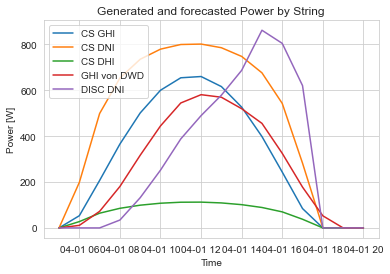

In [218]:
fig, ax = plt.subplots()
ax.set_xlabel("Time") 
ax.set_ylabel("Power [W]")
ax.set_title("Generated and forecasted Power by String")
sns.lineplot(x="DATE", y="ghi", data=cs, label="CS GHI", ax=ax)
sns.lineplot(x="DATE", y="dni", data=cs, label="CS DNI", ax=ax)
sns.lineplot(x="DATE", y="dhi", data=cs, label="CS DHI", ax=ax)
sns.lineplot(x="DATE", y=ghi, data=ghi, label="GHI von DWD", ax=ax)
sns.lineplot(x="DATE", y="dni", data=dni, label="DISC DNI", ax=ax)

In [219]:
campbell = pvlib.irradiance.campbell_norman(solpos.zenith, transmittance=0.7)
# Clearsky: transmittance = 0.7

In [220]:
campbell

,ghi,dni,dhi
DATE,,,
2021-04-01 05:00:00+00:00,NaN,NaN,NaN
2021-04-01 06:00:00+00:00,59.457612,8.256326e+01,48.965896
2021-04-01 07:00:00+00:00,195.145222,3.914842e+02,83.477458
2021-04-01 08:00:00+00:00,353.836567,5.944058e+02,99.265551
2021-04-01 09:00:00+00:00,496.331727,7.117001e+02,107.425869
2021-04-01 10:00:00+00:00,602.754272,7.772421e+02,111.766037
2021-04-01 11:00:00+00:00,661.756118,8.079545e+02,113.753352
2021-04-01 12:00:00+00:00,667.729913,8.108778e+02,113.941062
2021-04-01 13:00:00+00:00,620.146567,7.866595e+02,112.378406


<AxesSubplot:title={'center':'Generated and forecasted Power by String'}, xlabel='Time', ylabel='Power [W]'>

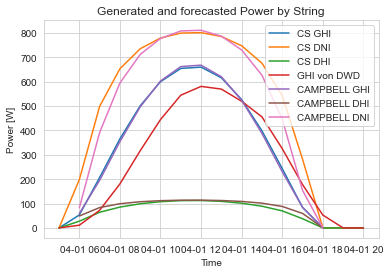

In [221]:
fig, ax = plt.subplots()
ax.set_xlabel("Time") 
ax.set_ylabel("Power [W]")
ax.set_title("Generated and forecasted Power by String")
sns.lineplot(x="DATE", y="ghi", data=cs, label="CS GHI", ax=ax)
sns.lineplot(x="DATE", y="dni", data=cs, label="CS DNI", ax=ax)
sns.lineplot(x="DATE", y="dhi", data=cs, label="CS DHI", ax=ax)
sns.lineplot(x="DATE", y=ghi, data=ghi, label="GHI von DWD", ax=ax)
sns.lineplot(x="DATE", y="ghi", data=campbell, label="CAMPBELL GHI", ax=ax)
sns.lineplot(x="DATE", y="dhi", data=campbell, label="CAMPBELL DHI", ax=ax)
sns.lineplot(x="DATE", y="dni", data=campbell, label="CAMPBELL DNI", ax=ax) 

### Testen - was passiert wenn die GHI-Werte um eine Stunde in die Zukunft verschoben sind?

Nachfolgende wurde simuliert, dass die aus dem Campbell-Modell gewonnenen Werte nicht zur Sonnenposition passen.
In den Beispieldaten hat man diesen Effekt aus realen Daten immer wieder gesehen. Im folgenden Beispiel sieht man, was passiert:

Die Kurve DISC DNI MOD zeigt gegenüber DISC DNI was passiert, wenn die GHI-Werte um eine Stunde zeitversetzt sind....

Als Maßnahme werden die Werte vom DWD entsprechend um eine Stunde korrigiert.

In [222]:
dni =  pvlib.irradiance.disc(ghi=campbell.ghi, solar_zenith=solpos.zenith, datetime_or_doy=campbell.index, min_cos_zenith=0.01, max_zenith=85)
campbell.index = campbell.index + pd.offsets.Hour(1)
campbell.drop(campbell.tail(1).index,inplace=True)
solpos.drop(solpos.head(1).index,inplace=True)
dni_mod =  pvlib.irradiance.disc(ghi=campbell.ghi, solar_zenith=solpos.zenith, datetime_or_doy=campbell.index, min_cos_zenith=0.01, max_zenith=85)
#dni

<AxesSubplot:title={'center':'Generated and forecasted Power by String'}, xlabel='Time', ylabel='Power [W]'>

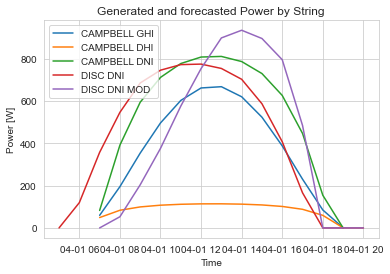

In [223]:
fig, ax = plt.subplots()
ax.set_xlabel("Time") 
ax.set_ylabel("Power [W]")
ax.set_title("Generated and forecasted Power by String")
sns.lineplot(x="DATE", y="ghi", data=campbell, label="CAMPBELL GHI", ax=ax)
sns.lineplot(x="DATE", y="dhi", data=campbell, label="CAMPBELL DHI", ax=ax)
sns.lineplot(x="DATE", y="dni", data=campbell, label="CAMPBELL DNI", ax=ax) 
sns.lineplot(x="DATE", y="dni", data=dni, label="DISC DNI", ax=ax) 
sns.lineplot(x="DATE", y="dni", data=dni_mod, label="DISC DNI MOD", ax=ax) 